In [1]:
# %matplotlib notebook

from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd



In [2]:
### Let's generate some synthetic data

In [3]:
X, y = datasets.make_blobs(n_samples=1000, n_features=2, centers=5, cluster_std=[0.5, 0.5, 0.5, 1, 1],random_state=111)

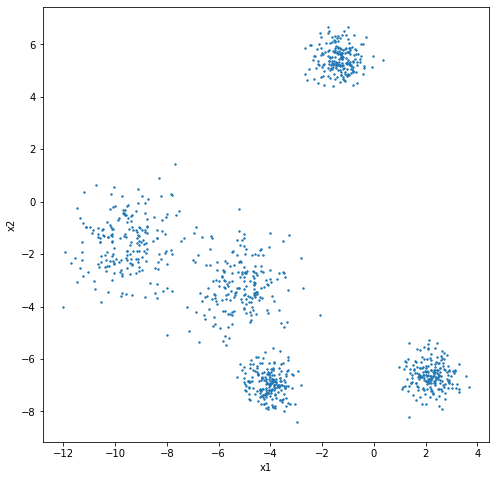

In [4]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], s=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [5]:
from sklearn.cluster import KMeans


k=5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

Let's take a look at cluster centers

In [6]:
all_centers=kmeans.cluster_centers_
print(all_centers)


[[ 2.19461578 -6.62978549]
 [-9.52314013 -1.56755724]
 [-1.34304201  5.43215273]
 [-4.05351568 -6.90941348]
 [-5.16949597 -3.17397257]]


In [7]:
## Visualize data points and cluster centers
def plot_cluster_centers(X,all_centers,k,label):
    plt.figure(figsize = (8, 8))
    plt.scatter(X[:, 0], X[:, 1], s=3,label='data points')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(label)
    plt.scatter(all_centers[:, 0], all_centers[:, 1], color = 'red', s = 200, label = 'centroids')
    for i in range(k):
        plt.annotate('cluster '+str(i),(all_centers[i,0],all_centers[i,1]),fontsize=15)
    plt.show()

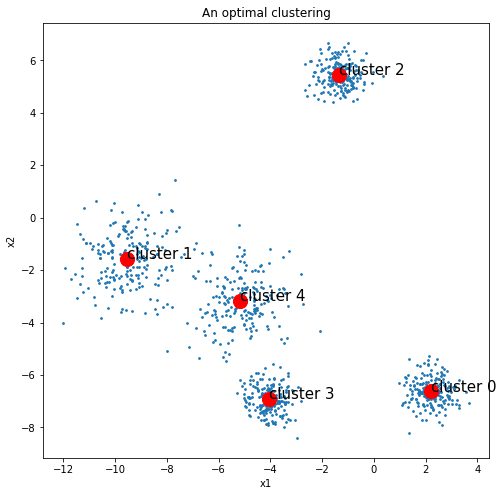

In [8]:
plot_cluster_centers(X,all_centers,k,'An optimal clustering')

Now that we have a trained clustering model, let's try to predict the cluster(class) of a new data point.

In [9]:
X_new = np.array([[0, 5], [0, 0], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([2, 2, 2, 2], dtype=int32)

### Let us plot the decision boundaries for all the clusters obtained.

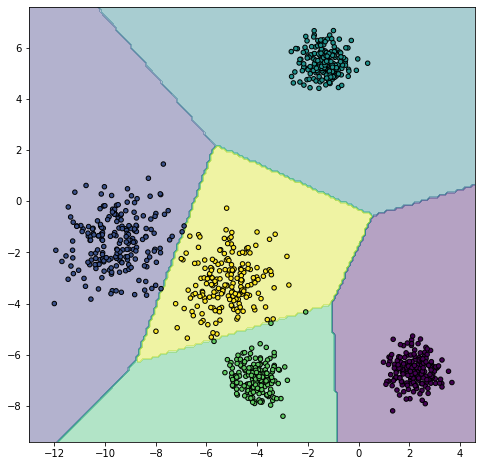

In [10]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, edgecolor='k')
plt.show()

### Hard Clustering : Assigning each instance to single cluster.

### Soft Clustering : A data point can belong to multiple clusters. Can you think of use cases where soft clustering would be more helpful than hard clustering? (Hint: think of information retrieval on web)

In [11]:
kmeans.transform(X_new) ## measures distance between the data points and clusters. In case of hard clustering, nearest one is chosen.

array([[11.83504326, 11.5681894 ,  1.41085712, 12.58034653,  9.67147952],
       [ 6.98358032,  9.65129181,  5.59571667,  8.01067937,  6.06611824],
       [10.94151734,  7.96328678,  2.94293675,  9.96525819,  6.54405456],
       [10.50414281,  7.68741693,  3.36794142,  9.46820771,  6.07459278]])

## Do you think centroid initialization can affect the quality of clusters ?

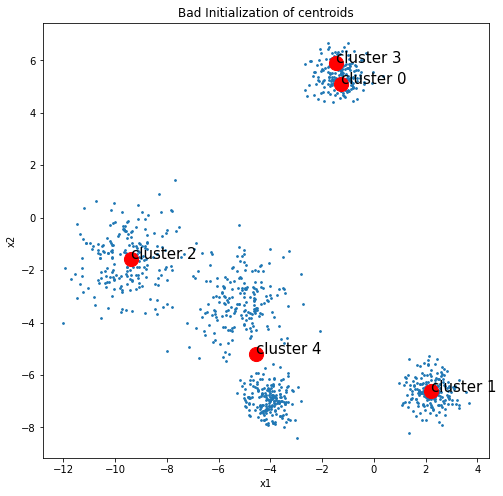

In [12]:
bad_init = np.array([[-4,-2], [-4,-2.1], [-4.1,-2], [-4,-2.1], [-4.05,-2]])
kmeans_bad_init = KMeans(n_clusters=5, init=bad_init, n_init=1)

kmeans_bad_init.fit(X)


plot_cluster_centers(X,kmeans_bad_init.cluster_centers_,k,'Bad Initialization of centroids')

### How do we decide if a clustering good or bad without visualizing the locations ?
#### Answer : Inertia -> Mean squared distance between each instance and its closest centroid. We look for clustering with lower inertia.

In [13]:
print('Good Initialization inertia score : ',kmeans.inertia_)
print('Bad Initialization inertia score : ',kmeans_bad_init.inertia_)

Good Initialization inertia score :  1066.7105617418617
Bad Initialization inertia score :  2482.352475204995


### What do you think was bad about above initialization ? (Hint: think of mean of data distribution)

### Good news: KMeans by default uses K-Means++ , a smart initialization technique that tends to select centroids that are distant from one another.

### Do you think number of clusters can affect the optimality of clustering?

#### Let's try with k=3 and k=8

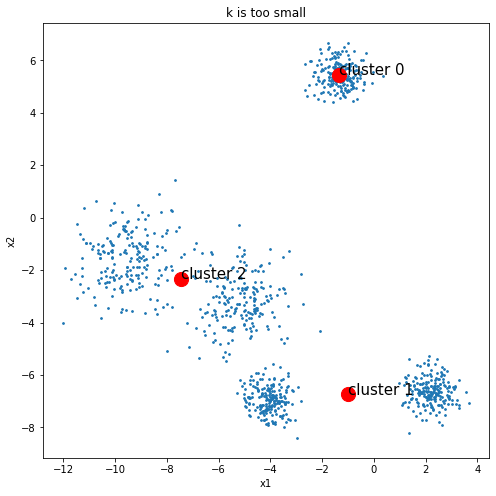

In [14]:
kmeans_3=KMeans(n_clusters=3)
kmeans_3.fit(X)


plot_cluster_centers(X,kmeans_3.cluster_centers_,3,'k is too small')

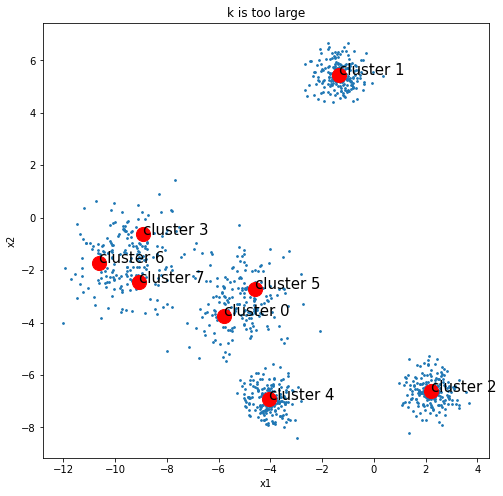

In [15]:
kmeans_8=KMeans(n_clusters=8)
kmeans_8.fit(X)


plot_cluster_centers(X,kmeans_8.cluster_centers_,8,'k is too large')

### Can we decide correct number of clusters by comparing inertia ? Think about it!

#### Let's plot inertia as a function of number of clusters

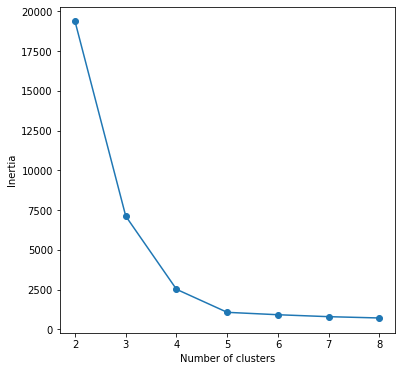

In [16]:
candidate_clusters=[2,3,4,5,6,7,8]
inertia_scores=[]
for cluster in candidate_clusters:
    kmeans=KMeans(cluster)
    kmeans.fit(X)
    inertia_scores.append(kmeans.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(candidate_clusters,inertia_scores,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### The above graph looks like an arm where the elbow looks like a good choice. Any lower values would be dramatic and higher values wouldn't help too much. This is called elbow method.

### Task: Explore Silhouette method for choosing number of clusters.

### Let's use KMeans to perform clustering on a real world dataset.

In [17]:
from sklearn.datasets import load_wine

wine_data=load_wine()

X = pd.DataFrame(wine_data.data, columns = wine_data.feature_names)
y = pd.DataFrame(wine_data.target, columns = ['target'])

In [18]:
## Take a look at data and target
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [19]:
y.tail()

,target
173,2
174,2
175,2
176,2
177,2


In [20]:
print('Features are : ',X.columns)
print('Classes are : ',wine_data.target_names)

Features are :  Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')
Classes are :  ['class_0' 'class_1' 'class_2']


In [28]:
## Visualizing 2 features - Total Phenol and Alcohol

phenol_alcohol_data=X[['total_phenols','alcohol']]
phenol_alcohol_data['target']=y['target']

/tmp/ipykernel_627/1659338088.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phenol_alcohol_data['target']=y['target']


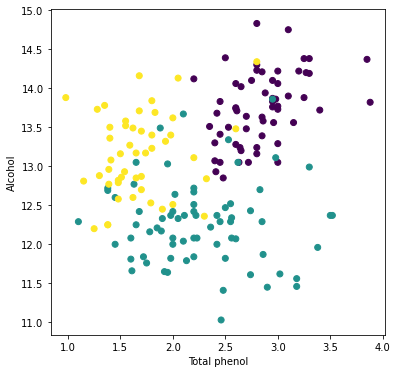

In [22]:
plt.figure(figsize = (6, 6))

plt.scatter(phenol_alcohol_data['total_phenols'],phenol_alcohol_data['alcohol'],c=phenol_alcohol_data['target'])

plt.xlabel('Total phenol')
plt.ylabel('Alcohol');

In [23]:
## Visualizing 13 features is difficult. Let's visualize any 3 of them.

al_malic_ash_data=X[['alcohol','malic_acid','ash']]
al_malic_ash_data['target']=y['target']

/tmp/ipykernel_627/2261967202.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  al_malic_ash_data['target']=y['target']


In [29]:
fig = plt.figure()
ax = Axes3D(fig)
labels=['class 0','class 1','class 2']
ax.scatter(al_malic_ash_data['alcohol'],al_malic_ash_data['malic_acid'],al_malic_ash_data['ash'],c=al_malic_ash_data['target'])
ax.set_xlabel('Alcohol')
ax.set_ylabel('Malic acid')
ax.set_zlabel('Ash')

plt.show()

<Figure size 432x288 with 0 Axes>

### Clustering dataset using 2 features - Total Phenol and Alcohol (Visualized above)

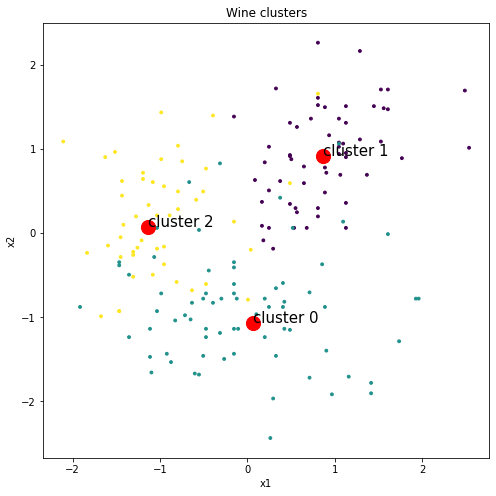

In [31]:
from sklearn.preprocessing import StandardScaler

phenol_alcohol_data_wo_target=phenol_alcohol_data.drop('target',axis='columns',inplace=False)
std_scaler_phenol_alcohol=StandardScaler()
kmeans_phenol_alcohol=KMeans(n_clusters=3)
phenol_alcohol_data_transformed=std_scaler_phenol_alcohol.fit_transform(phenol_alcohol_data_wo_target)
kmeans_phenol_alcohol.fit(phenol_alcohol_data_transformed)



all_centers=kmeans_phenol_alcohol.cluster_centers_
plt.figure(figsize = (8, 8))
plt.scatter(phenol_alcohol_data_transformed[:,0], phenol_alcohol_data_transformed[:,1],c=phenol_alcohol_data['target'], s=8,label='data points')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Wine clusters')
plt.scatter(all_centers[:, 0], all_centers[:, 1], color = 'red', s = 200, label = 'centroids')
for i in range(3):
    plt.annotate('cluster '+str(i),(all_centers[i,0],all_centers[i,1]),fontsize=15)
plt.show()


### Predict cluster for a test instance

In [26]:
test_data=[[19,15],[20,1]] 
kmeans_phenol_alcohol.predict(std_scaler_phenol_alcohol.transform(test_data))

/home/gandalf/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1, 0], dtype=int32)

### Clustering dataset using 3 features - Alcohol, Malic acid and Ash (Visualized above)

In [27]:
al_malic_ash_data_wo_target=al_malic_ash_data.drop('target',axis='columns',inplace=False)
std_scaler_al_malic_ash=StandardScaler()
kmeans_al_malic_ash=KMeans(n_clusters=3)
al_malic_ash_data_transformed=std_scaler_al_malic_ash.fit_transform(al_malic_ash_data_wo_target)
kmeans_al_malic_ash.fit(al_malic_ash_data_transformed)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(al_malic_ash_data_transformed[:,0], al_malic_ash_data_transformed[:,1],al_malic_ash_data_transformed[:,2],
           c=al_malic_ash_data['target'], s=8,label='data points')
ax.set_xlabel('Alcohol')
ax.set_ylabel('Malic acid')
ax.set_zlabel('Ash')

all_centers=kmeans_al_malic_ash.cluster_centers_

ax.scatter(all_centers[:, 0], all_centers[:, 1],all_centers[:, 2], color = 'red', s = 200, label = 'centroids')
for i in range(3):
    ax.text(all_centers[i,0],all_centers[i,1],all_centers[i,2],  'Cluster '+str(i), size=10, zorder=1,  
    color='k')
plt.show()

<Figure size 432x288 with 0 Axes>

### Task : Perform clustering using all the features of dataset and find correctness using predict().